# Titanic - Machine Learning from Disaster - Kaggle Competition

Click <a href=" https://www.kaggle.com/competitions/titanic">here</a> for a description of the famous Titanic Kaggle Competition.

<h3 style='color:Red;'>&diams; Load the Data


Data are taken from Kaggle: 
click <a href="https://www.kaggle.com/competitions/titanic/data">here</a> for a description of the Titanic dataset.

In [1]:
# import the libraries

import pandas as pd
import numpy as np

In [2]:
# Load the train.csv data and see the top 10 rows of the dataframe, df.

df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h3 style='color:Red;'>&diams; Exploratory Data Analysis

In [3]:
# Dimension of the dataframe

df.shape

(891, 12)

In [4]:
# Info on the dataframe

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Import visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\giuli\AppData\Local\Temp\ipykernel_36128\373972628.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('PassengerId', axis=1).corr(),cmap='magma',annot=True)


<Axes: >

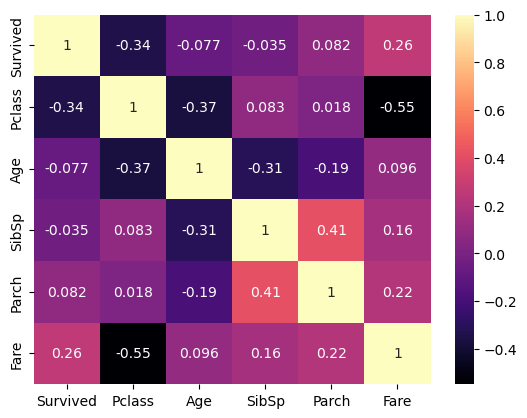

In [6]:
# Pearson correlation between numeric features

sns.heatmap(df.drop('PassengerId', axis=1).corr(),cmap='magma',annot=True)

In [7]:
sns.set_style('darkgrid')

<Axes: xlabel='Survived', ylabel='count'>

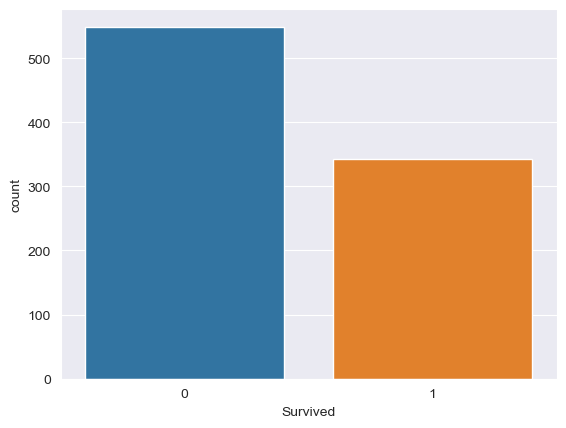

In [8]:
# Total number of survived and not-survived people

sns.countplot(x='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

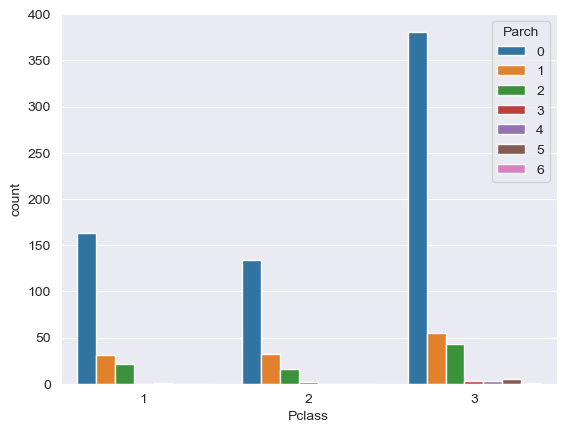

In [9]:
# Total number of passengers grouped by their families' size per each class

sns.countplot(x='Pclass', hue='Parch', data=df)

<Axes: xlabel='Survived', ylabel='count'>

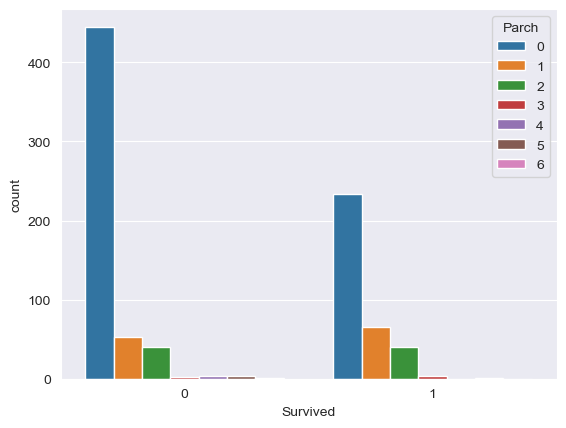

In [10]:
# Total number of survived and not-survived passengers grouped by their families' size

sns.countplot(x='Survived', hue='Parch', data=df)

<Axes: xlabel='Survived', ylabel='count'>

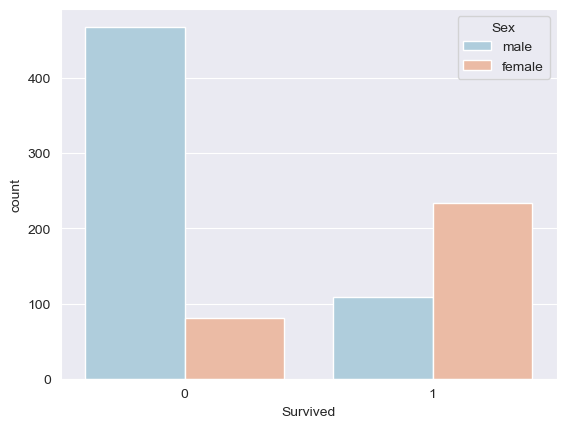

In [11]:
# Total number of survived and not-survived passengers grouped by their sex

sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

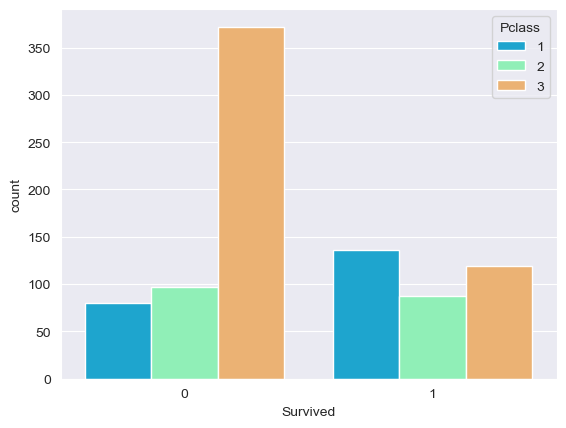

In [12]:
# Total number of survived and not-survived passengers grouped by their class

sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

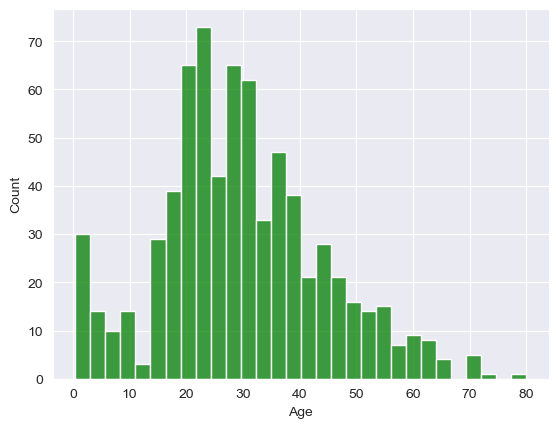

In [13]:
# Age distribution 

sns.histplot(df['Age'].dropna(),kde=False,color='green',bins=30)

<h3 style='color:Red;'>&diams; Dealing with Missing Data

In [14]:
# Number of missing data per category

miss_data = df.isnull().sum().to_frame().rename(columns={0:'Number of Missing Values'})
miss_data

,Number of Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

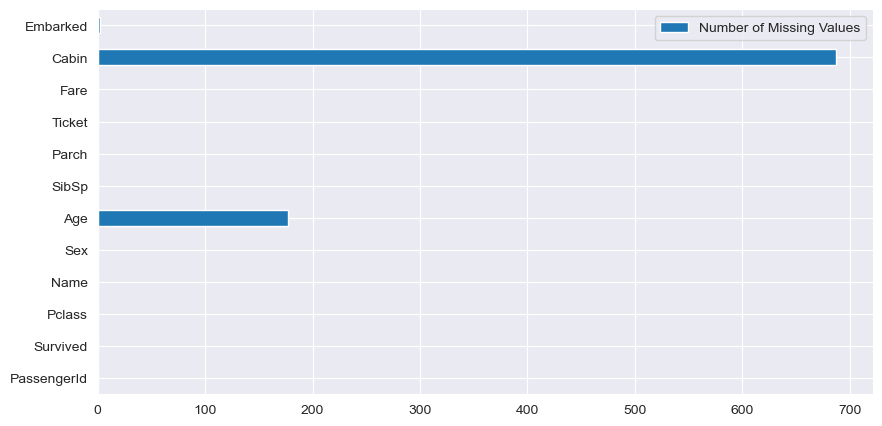

In [15]:
miss_data.plot(y='Number of Missing Values', kind='barh', figsize=(10, 5))


In [16]:
!pip install missingno

<Axes: >

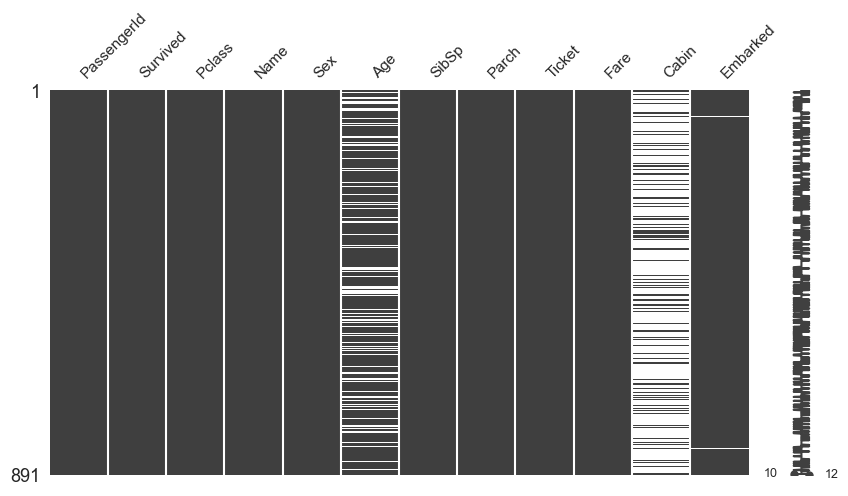

In [17]:
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(df, figsize=(10,5), fontsize=11, color=(0.25, 0.25, 0.25))

### Clean missing data


#### Embarked column - missing data

In [18]:
# Number of passengers per Embrarked column

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# Replace the two Embarked missing values with the most common value

most_frequent_value= df['Embarked'].value_counts().idxmax()
df['Embarked'].replace(np.nan, most_frequent_value, inplace=True)
print(F"Most frequent value = {most_frequent_value}")

Most frequent value = S


#### Age column - missing data

In [20]:
# Define a function new_age which substitute Age missing values with the average age of their class


def new_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return df['Age'][df['Pclass']==1].mean()

        elif Pclass == 2:
            return df['Age'][df['Pclass']==2].mean()

        else:
            return df['Age'][df['Pclass']==3].mean()

    else:
        return Age

In [21]:
# Apply the new_age function to the Age and Pclass columns

df['Age'] = df[['Age','Pclass']].apply(new_age,axis=1)

#### Cabin column - missing data

In [22]:
# We fill missing entries of Cabin with a new cabin's cathegory called 'Unknown'

df['Cabin'].fillna('Unknown', inplace=True)

In [23]:
# Check missing values: we have no more missing data!

miss_data = df.isnull().sum().to_frame().rename(columns={0:'Number of Missing Values'})
miss_data

,Number of Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<h3 style='color:Red;'>&diams; Data Engineering

#### Cabin Letter - feature
We create a new column called 'CabinLetter' containing the letter of each Cabin datapoint.

In [24]:
# Define the function cabin_letter which extract the letter from each element of the Cabin column

def cabin_letter(cabin):
    if cabin=='Unknown':
        return cabin
    else:
        return cabin[0]

In [25]:
# Apply cabin_letter to the cabin column and we create a new column of df

df['CabinLetter']=df['Cabin'].apply(cabin_letter)

In [26]:
# Elements of CabinLetter column

df['CabinLetter'].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

#### Title of each passenger - feature

In [27]:
# Define a function which extract the title of a passenger from name

def person_title(name):
    return name.split(',')[1].split()[0]

In [28]:
# Apply person_title to the name column and we create a new column of df called 'Title'

df['Title'] = df['Name'].apply(person_title)

In [29]:
# Elements of Title column

df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [30]:
df[df['Title']=='the']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,Title
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,B,the


In [31]:
df.loc[df['PassengerId']==760,'Title']='the Countess.'

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Unknown,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Unknown,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Unknown,Mr.


In [33]:
# Introduce new bigger title cathegories: officer, royalty, Mr, Mrs, Miss, Master

officer = ['Rev.','Col.', 'Capt.', 'Major.']
royalty = ['Lady.','the Countess.','Sir.','Jonkheer.', 'Don.','Dona.']
Mr = ['Mr.']
Mrs = ['Mrs.', 'Mme.']
Miss = ['Miss.','Mlle.']
Master = ['Master.']

In [34]:
# Define the function title_feature which assigns to each title one of the above cathegories

def title_feature(tit):
     if tit in officer:
             tit='Officer'
             return tit
     elif tit in royalty:
             tit='Noble'
             return tit
     elif tit in Mrs:
             tit='Mrs'
             return tit
     elif tit in Miss:
             tit='Miss'
             return tit
     elif tit in Mr:
             tit = 'Mr'
             return tit
     elif tit in Master: 
             tit='Master'
             return tit

In [35]:
# Check the function

title_feature('Capt.')

'Officer'

In [36]:
title_feature('Mr.')

'Mr'

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'CabinLetter', 'Title'],
      dtype='object')

In [38]:
# # Apply title_feature to the Title column and we create a new column of df called 'Title_Cathegory'

df['Title_Cathegory']=df['Title'].apply(title_feature)

In [39]:
# Total number of passengers per title cathegory

df.groupby('Title_Cathegory').count()['Sex']

Title_Cathegory
Master      40
Miss       184
Mr         517
Mrs        126
Noble        5
Officer     11
Name: Sex, dtype: int64

#### Single passenger - feature

In [40]:
# Define a function single which return 1 if the passenger travel alone and 0 if the passenger travel with family.

def single(col):
    sibsp = col[0]
    parch = col[1]
    
    if sibsp+parch==0:
       return 1
    else: 
       return 0

In [41]:
# Apply single to SibSp and Parch columns and define SingP column

df['SingP'] = df[['SibSp','Parch']].apply(single,axis=1)

<Axes: xlabel='Survived', ylabel='count'>

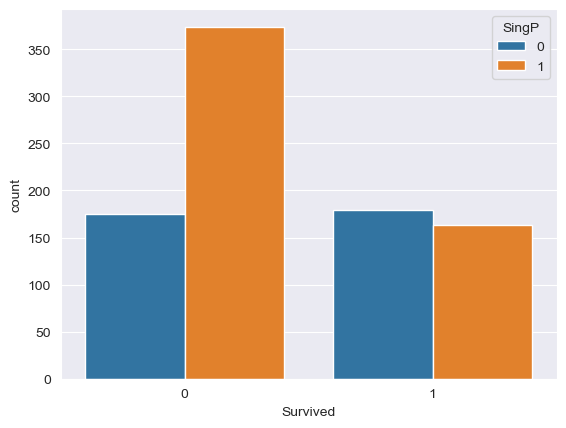

In [42]:
sns.countplot(x='Survived',hue='SingP',data=df)

#### Family size - feature

In [43]:
# Define a function family_size which calculate the size of each family

def family_size(col):
    sibsp = col[0]
    parch = col[1]
    
    return sibsp+parch+1
       
    

In [44]:
# Apply family_size function to SibSp and Parch columns and create a new column of df called Family_Size

df['Family_Size'] = df[['SibSp','Parch']].apply(family_size,axis=1)

In [45]:
# fsize_survival_rate

fsize_survival_rate = df.groupby('Family_Size')['Survived'].mean().reset_index()
fsize_survival_rate

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


<Axes: xlabel='Family_Size', ylabel='Survived'>

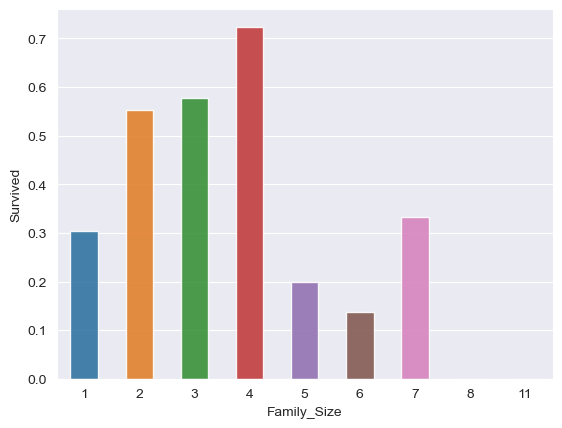

In [46]:
# Plot fsize_survival_rate

sns.barplot(x='Family_Size', y='Survived', data=fsize_survival_rate,  alpha= 0.9, width= 0.5)

#### One-Hot encoding

In [47]:
# Get dummies of cathegorical features

sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
cabin = pd.get_dummies(df['CabinLetter'],drop_first=True)
title_cat = pd.get_dummies(df['Title_Cathegory'],drop_first=True)

In [48]:
# Drop our no one-hot encoded cathegorical features

df.drop(['Sex','Embarked','Name','Ticket','Cabin','CabinLetter','Title'],axis=1,inplace=True)

In [49]:
# Upgrade df with the concatenation of df + cathegorical features

df = pd.concat([df,sex,embark,cabin,title_cat],axis=1)


In [50]:
# Check the columns of df

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Title_Cathegory', 'SingP', 'Family_Size', 'male', 'Q', 'S', 'B', 'C',
       'D', 'E', 'F', 'G', 'T', 'Unknown', 'Miss', 'Mr', 'Mrs', 'Noble',
       'Officer'],
      dtype='object')

In [51]:
df.drop(['Title_Cathegory'],axis=1,inplace=True)

In [52]:
# Top 5 of df

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SingP,Family_Size,male,...,E,F,G,T,Unknown,Miss,Mr,Mrs,Noble,Officer
0,1,0,3,22.0,1,0,7.2500,0,2,1,...,0,0,0,0,1,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,2,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,2,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,1,1,...,0,0,0,0,1,0,1,0,0,0


In [53]:
#def null_array(n):
 #   x=np.zeros(n)
 #   return x

In [54]:
# Harbor
#def porto(ticket):
    #if len(ticket.split())==2:
        #return ticket.split()[0]
    #else:
        #return 'Unknown'

In [55]:
#df['Porto']=df['Ticket'].apply(porto)

<h3 style='color:Red;'>&diams; ML - Logistic Regression 

In [56]:
# Import tools from sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [57]:
# Logistic Regression model

logmodel = LogisticRegression()

In [58]:
# Label 

y = df['Survived']

In [59]:
cols=['Fare','SingP']

for i in [0,1]:

    X_train, X_test, y_train, y_test = train_test_split(df.drop(['PassengerId','Survived',cols[i]],axis=1),y, test_size=0.30, random_state=101)

    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)


    print('Classification Report without {0}: \n'.format(cols[i]), classification_report(y_test,predictions))
    #print('Score: {0}'.format(compute_score(logmodel, df.drop(['PassengerId','Survived',cols[i]],axis=1), y, scoring='accuracy')))
    
    i=i+1





Classification Report without Fare: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.84      0.70      0.77       114

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268

Classification Report without SingP: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [60]:

X_train, X_test, y_train, y_test = train_test_split(df.drop(['PassengerId','Survived','Fare','SingP'],axis=1),y, test_size=0.30, random_state=101)

logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


print('Classification Report without both Fare and SingP: \n', classification_report(y_test,predictions))
#print('Score: ', compute_score(logmodel, df.drop(['PassengerId','Survived','Fare','SingP'],axis=1), y, scoring='accuracy'))
print('Logclass: ', logmodel.__class__)
    

Classification Report without both Fare and SingP: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.84      0.68      0.75       114

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

Logclass:  <class 'sklearn.linear_model._logistic.LogisticRegression'>


C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Training without Fare has the best accuracy score. We retrain the model without Fare feature.

X_train, X_test, y_train, y_test = train_test_split(df.drop(['PassengerId','Survived','Fare'],axis=1),y, test_size=0.30, random_state=101)

logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


print('Classification Report without both Fare and SingP: \n', classification_report(y_test,predictions))
#print('Score: ', compute_score(logmodel, df.drop(['PassengerId','Survived','Fare','SingP'],axis=1), y, scoring='accuracy'))
print('Logclass: ', logmodel.__class__)
    

Classification Report without both Fare and SingP: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.84      0.70      0.77       114

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268

Logclass:  <class 'sklearn.linear_model._logistic.LogisticRegression'>


C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
#predictions = logmodel.predict(X_test)

<h3 Style='color:Red;'> &diams; Reformat the test data for the algorithm

In [63]:
#Load the test dataframe
df_test = pd.read_csv('test.csv')

In [64]:
#Dimension of df_test
df_test.shape

(418, 11)

In [65]:
#Show the first 5 rows of df_test
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
df_test['Cabin'].fillna('Unknown', inplace=True)
df_test['CabinLetter']=df_test['Cabin'].apply(cabin_letter)

In [67]:
df_test['CabinLetter'].unique()

array(['Unknown', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [68]:
df_test['Title']=df_test['Name'].apply(person_title)

In [69]:
df_test.groupby('Title').count()['Age']

Title
Col.         2
Dona.        1
Dr.          1
Master.     17
Miss.       64
Mr.        183
Mrs.        62
Ms.          0
Rev.         2
Name: Age, dtype: int64

In [70]:
df_test['Title_Cathegory'] = df_test['Title'].apply(title_feature)

In [71]:
df_test['SingP'] = df_test[['SibSp','Parch']].apply(single,axis=1)

In [72]:
df_test['Family_Size'] = df_test[['SibSp','Parch']].apply(family_size,axis=1)

In [73]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,Title,Title_Cathegory,SingP,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Unknown,Mr.,Mr,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Unknown,Mrs.,Mrs,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Unknown,Mr.,Mr,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Unknown,Mr.,Mr,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Unknown,Mrs.,Mrs,0,3


In [74]:
sex_test = pd.get_dummies(df_test['Sex'],drop_first=True)
cabin_test = pd.get_dummies(df_test['CabinLetter'],drop_first=True)
embarked_test = pd.get_dummies(df_test['Embarked'],drop_first=True)
#title_test = pd.get_dummies(df_test['Title'],drop_first=True)
titlecat_test = pd.get_dummies(df_test['Title_Cathegory'],drop_first=True)

In [75]:
df_test = pd.concat([df_test,sex_test,embarked_test,cabin_test,titlecat_test],axis=1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,D,E,F,G,Unknown,Miss,Mr,Mrs,Noble,Officer
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,...,0,0,0,0,1,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,...,0,0,0,0,1,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,...,0,0,0,0,1,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,...,0,0,0,0,1,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,...,0,0,0,0,1,0,0,1,0,0


In [76]:
df_test=df_test.drop(['Name','Sex','Cabin','CabinLetter','Ticket','Embarked','Fare','Title_Cathegory'],axis=1)


In order to obtain the same format of the training dataset, we want to add the cathegory T to df_test. We add a null vector.

In [77]:
def null_array(n):
    x=np.zeros(n)
    return x

In [78]:
v=np.array(null_array(10), dtype=int)
v

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
df_test.shape

(418, 23)

In [80]:
df_test.insert(17,'T',np.array(null_array(418),dtype=int))

In [81]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Title', 'SingP',
       'Family_Size', 'male', 'Q', 'S', 'B', 'C', 'D', 'E', 'F', 'G', 'T',
       'Unknown', 'Miss', 'Mr', 'Mrs', 'Noble', 'Officer'],
      dtype='object')

In [82]:
# Number of missing data per category
miss_data_test = df_test.isnull().sum().to_frame().rename(columns={0:'Number of Missing Values'})
miss_data_test

,Number of Missing Values
PassengerId,0
Pclass,0
Age,86
SibSp,0
Parch,0
Title,0
SingP,0
Family_Size,0
male,0
Q,0


In [83]:
df_test['Age'] = df_test[['Age','Pclass']].apply(new_age,axis=1)

In [84]:
miss_data_test = df_test.isnull().sum().to_frame().rename(columns={0:'Number of Missing Values'})
miss_data_test

,Number of Missing Values
PassengerId,0
Pclass,0
Age,0
SibSp,0
Parch,0
Title,0
SingP,0
Family_Size,0
male,0
Q,0


In [85]:
# Drop out the Title column

df_test=df_test.drop(['Title'],axis=1)

In [93]:
# Check if df_test columns coincide with the training dataset columns

df_test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'SingP',
       'Family_Size', 'male', 'Q', 'S', 'B', 'C', 'D', 'E', 'F', 'G', 'T',
       'Unknown', 'Miss', 'Mr', 'Mrs', 'Noble', 'Officer'],
      dtype='object')

In [94]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'SingP', 'Family_Size', 'male', 'Q',
       'S', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown', 'Miss', 'Mr', 'Mrs',
       'Noble', 'Officer'],
      dtype='object')

In [95]:
# Predictions of survived/not-survived passengers

new_predictions = logmodel.predict(df_test.drop('PassengerId', axis=1))

In [96]:
new_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [97]:
df_new_predictions = pd.DataFrame(new_predictions, columns=['Survived'])
df_new_predictions

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [98]:
# Right format for submissions

gender_submissions=pd.read_csv('gender_submission.csv')
gender_submissions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [99]:
# My submission

submissions= pd.concat([df_test['PassengerId'],df_new_predictions],axis=1)

In [100]:
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [101]:
# Save the submission.csv file

submissions.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


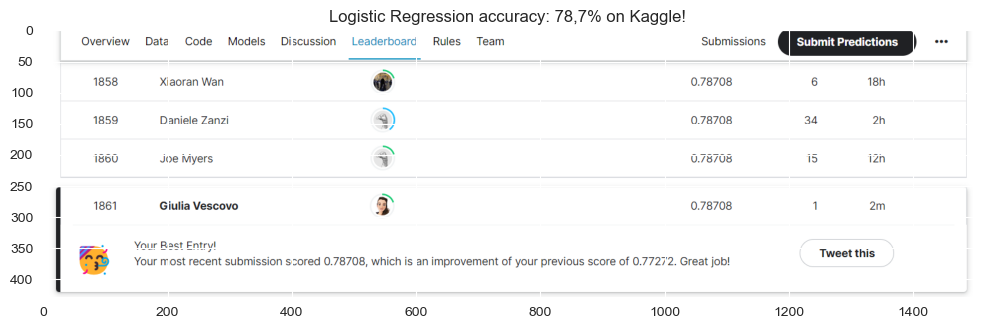

In [112]:
# Accuracy score

from matplotlib import image as mpimg
 
plt.figure(figsize=(12,12))
    
plt.title("Logistic Regression accuracy: 78,7% on Kaggle!")
image = mpimg.imread("score.png")
plt.imshow(image)
plt.show()